In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    num_samples, num_feature = data.shape
    return data[np.random.choice(num_samples, k)]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [4]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    distance_list = []
    num_cluster, _ = mu.shape
    for k_th in range(num_cluster):
        sum_squares = np.sum(np.square(data - mu[k_th, :]), axis=1)
        distance_list.append(sum_squares)
    return np.array(distance_list).T

#### Update k-means parameters

In [5]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    _, num_features = data.shape
    num_clusters, _ = mu_old.shape
    distance_matrix = build_distance_matrix(data, mu_old)
    losses = np.min(distance_matrix, axis=1)
    assignments = np.argmin(distance_matrix, axis=1)

    # update the mu
    mu = np.empty((num_clusters, num_features))
    for k_th in range(num_clusters):
        rows = np.where(assignments == k_th)
        mu[k_th, :] = np.mean(np.squeeze(data[rows, :]), axis=0)
    return losses, assignments, np.nan_to_num(mu)

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 185.26209975735293.
(272, 2)
[  0   4   6   7   9  11  12  14  17  19  22  25  28  29  31  33  37  39
  40  42  45  48  51  53  55  58  59  61  63  65  66  67  70  72  77  79
  81  85  87  89  91  93  96  99 101 103 104 106 108 109 112 113 115 117
 119 122 124 125 127 129 131 133 135 137 139 140 142 143 146 148 150 151
 153 156 157 159 161 163 167 169 172 174 175 178 181 182 183 185 186 188
 190 193 194 195 196 197 199 201 202 204 206 207 209 211 217 221 224 225
 226 227 229 232 234 237 238 242 244 245 247 251 254 255 257 259 260 261
 263 267 269]
[  1   2   3   5   8  10  13  15  16  18  20  21  23  24  26  27  30  32
  34  35  36  38  41  43  44  46  47  49  50  52  54  56  57  60  62  64
  68  69  71  73  74  75  76  78  80  82  83  84  86  88  90  92  94  95
  97  98 100 102 105 107 110 111 114 116 118 120 121 123 126 128 130 132
 134 136 138 141 144 145 147 149 152 154 155 158 160 162 164 165 166 168
 170 1

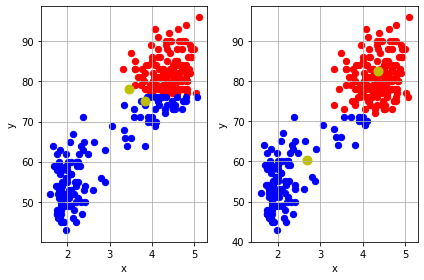

The current iteration of k-means is: 1,                the average loss is 45.026995098931806.
(272, 2)
[  0   2   4   6   7   9  11  12  14  17  19  22  24  25  27  28  29  30
  31  33  34  37  39  40  42  44  45  48  50  51  53  55  58  59  61  63
  65  66  67  69  70  72  75  77  78  79  80  81  84  85  86  87  89  91
  93  95  96  97  99 101 103 104 106 108 109 110 112 113 115 117 119 122
 124 125 127 129 131 133 135 137 139 140 142 143 144 146 148 150 151 153
 156 157 159 161 163 165 167 169 172 174 175 176 178 179 181 182 183 185
 186 188 190 192 193 194 195 196 197 199 201 202 204 206 207 209 211 213
 215 217 219 221 223 224 225 226 227 229 232 234 237 238 240 242 244 245
 247 249 251 252 253 254 255 257 259 260 261 263 266 267 269 271]
[  1   3   5   8  10  13  15  16  18  20  21  23  26  32  35  36  38  41
  43  46  47  49  52  54  56  57  60  62  64  68  71  73  74  76  82  83
  88  90  92  94  98 100 102 105 107 111 114 116 118 120 121 123 126 128
 130 132 134 136 138 141 14

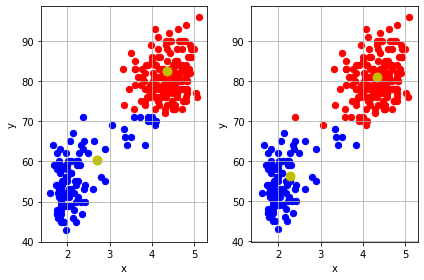

The current iteration of k-means is: 2,                the average loss is 33.97115028846499.
(272, 2)
[  0   2   4   6   7   9  11  12  14  17  19  22  23  24  25  27  28  29
  30  31  33  34  37  39  40  42  44  45  48  50  51  53  55  56  58  59
  61  63  65  66  67  69  70  72  73  75  77  78  79  80  81  82  84  85
  86  87  89  91  93  95  96  97  99 101 103 104 106 108 109 110 112 113
 115 117 119 121 122 124 125 127 129 131 133 135 137 139 140 142 143 144
 146 148 150 151 153 154 155 156 157 159 161 163 165 167 169 172 174 175
 176 178 179 181 182 183 185 186 188 190 192 193 194 195 196 197 199 201
 202 204 206 207 209 210 211 213 215 217 219 221 223 224 225 226 227 228
 229 230 232 234 237 238 240 242 244 245 247 249 251 252 253 254 255 256
 257 259 260 261 263 266 267 269 271]
[  1   3   5   8  10  13  15  16  18  20  21  26  32  35  36  38  41  43
  46  47  49  52  54  57  60  62  64  68  71  74  76  83  88  90  92  94
  98 100 102 105 107 111 114 116 118 120 123 126 128 130

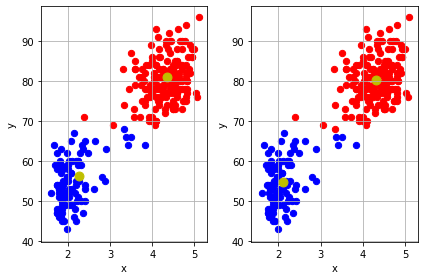

The current iteration of k-means is: 3,                the average loss is 32.73675733630585.
(272, 2)
[  0   2   4   6   7   9  11  12  14  17  19  22  23  24  25  27  28  29
  30  31  33  34  37  39  40  42  44  45  48  50  51  53  55  56  58  59
  61  63  65  66  67  69  70  72  73  75  77  78  79  80  81  82  84  85
  86  87  89  91  93  95  96  97  99 101 103 104 106 108 109 110 112 113
 115 117 119 121 122 124 125 127 129 131 133 135 137 139 140 142 143 144
 146 148 150 151 153 154 155 156 157 159 161 163 165 167 169 172 173 174
 175 176 178 179 181 182 183 185 186 188 190 192 193 194 195 196 197 199
 201 202 204 206 207 209 210 211 213 215 217 219 221 223 224 225 226 227
 228 229 230 232 234 237 238 240 242 244 245 247 249 251 252 253 254 255
 256 257 259 260 261 263 266 267 269 271]
[  1   3   5   8  10  13  15  16  18  20  21  26  32  35  36  38  41  43
  46  47  49  52  54  57  60  62  64  68  71  74  76  83  88  90  92  94
  98 100 102 105 107 111 114 116 118 120 123 126 128

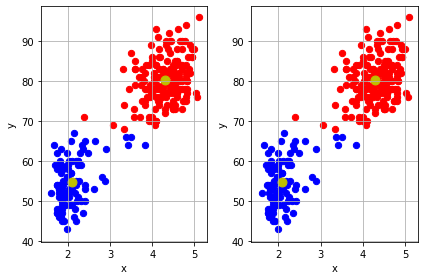

The current iteration of k-means is: 4,                the average loss is 32.72709088583533.
(272, 2)
[  0   2   4   6   7   9  11  12  14  17  19  22  23  24  25  27  28  29
  30  31  33  34  37  39  40  42  44  45  48  50  51  53  55  56  58  59
  61  63  65  66  67  69  70  72  73  75  77  78  79  80  81  82  84  85
  86  87  89  91  93  95  96  97  99 101 103 104 106 108 109 110 112 113
 115 117 119 121 122 124 125 127 129 131 133 135 137 139 140 142 143 144
 146 148 150 151 153 154 155 156 157 159 161 163 165 167 169 172 173 174
 175 176 178 179 181 182 183 185 186 188 190 192 193 194 195 196 197 199
 201 202 204 206 207 209 210 211 213 215 217 219 221 223 224 225 226 227
 228 229 230 232 234 237 238 240 242 244 245 247 249 251 252 253 254 255
 256 257 259 260 261 263 266 267 269 271]
[  1   3   5   8  10  13  15  16  18  20  21  26  32  35  36  38  41  43
  46  47  49  52  54  57  60  62  64  68  71  74  76  83  88  90  92  94
  98 100 102 105 107 111 114 116 118 120 123 126 128

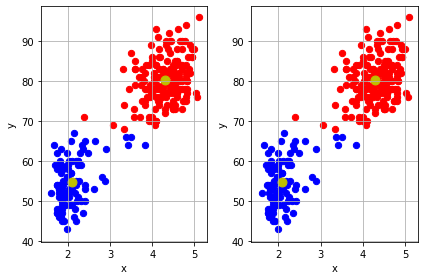

The current iteration of k-means is: 5,                the average loss is 32.72709088583533.


In [10]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iteration, l=average_loss))
        # check converge
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [7]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

AttributeError: module 'scipy.misc' has no attribute 'imread'

#### preprocess image

In [ ]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = original_image.reshape(
        (original_image.shape[0] * original_image.shape[1], 3))
    processed_image = processed_image.astype(float)
    print(
        "Current image: the shape of image={s}, the data type={dt}.".format(
            s=processed_image.shape, dt=processed_image.dtype))
    
    return processed_image

processed_image = preprocess_image(original_image)

In [ ]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    mu_old = initialize_clusters(processed_image, k)
    
    # init some empty lists to store the result.
    loss_list = []
    
    # start the kmeans
    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)

        if iter % 10 == 0:
            print(
                "The current iteration of kmeans is: {i}, the average loss is {l}.".format(
                    i=iter, l=average_loss))
        
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        # update mu
        mu_old = mu
        
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)